## Search for nearby Amenities for all site locations of each city
    List of Amenities by Categories:
    Categories: 
    
    A. Emergency Facilities 
       '''How accesible are these facilities in case of mass emergency on/around 
          sites for containing the situation and resuming business asap''' 
          
       1. Hospital
       2. Fire Station
       3. Doctor
       
    B. Accomodation 
       '''Many executive employees travel from outside the city for fews days a week and might need lodging
          facility as close to the company as possible. Also lot of local/not-local employees use vehicle
          for commute and will need parking nearby'''
          
       1. Lodging
       2. Parking
       
    C. Refreshment 
        '''Refeshment such as restaurants and cafes around site'''  
           
       1. Cafe/Restaurants
       
    D. Basic Errands/appointments
        '''By large employees tend to take care of daily errands and appoinments in lunch breaks or before/after
           work hours and prefer it to be as close to work as possible for obvious reasons''' 
           
       1. Super markets
       2. Post Office
       3. Doctor
       
    E. Fitness
        '''Fitness is top on priority list for a significant amount of employees now a days may be in gym or a 
           jog/walk in park.'''
           
       1. Gym

In [37]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
restaurant = pd.read_csv('../Results/Restaurant_Rating.csv')
del restaurant['Unnamed: 0']
del restaurant['restaurant Total Count']
del restaurant['price_level']
restaurant['Rating']=restaurant['Rating'].astype(float)
restaurant.replace('NAN', value=0, inplace=True)
restaurant = restaurant.rename(columns={'Facility restaurant':'EatingOut Facility'})
restaurant['Type']='Restaurant'
restaurant.head()

,City Name,EatingOut Facility,Latitude,Longitude,Rating,Site Name,Type
0,Northern Virginia Area,NED DEVINE'S IRISH SPORTS BAR & RESTAURANT,38.96,-77.42,3.7,Center for Innovation Technology,Restaurant
1,Northern Virginia Area,Anatolian Bistro Turkish Restaurant,38.96,-77.42,4.8,Center for Innovation Technology,Restaurant
2,Northern Virginia Area,China King Restaurant,38.96,-77.42,3.2,Center for Innovation Technology,Restaurant
3,Northern Virginia Area,Houlihan's,38.96,-77.42,3.4,Center for Innovation Technology,Restaurant
4,Northern Virginia Area,Elements On Level One,38.96,-77.42,3.2,Center for Innovation Technology,Restaurant


In [39]:
####TEST
#restaurant.groupby('City Name').median()

In [40]:
cafe = pd.read_csv('../Results/Cafe_Rating.csv')
del cafe['Unnamed: 0']
del cafe['cafe Total Count']
del cafe['price_level']
cafe['Rating']=cafe['Rating'].astype(float)
cafe.replace('NAN', value=0, inplace=True)
cafe = cafe.rename(columns={'Facility cafe':'EatingOut Facility'})
cafe['Type']='Cafe'
cafe.head()

,City Name,EatingOut Facility,Latitude,Longitude,Rating,Site Name,Type
0,Northern Virginia Area,Cafe 28,38.96,-77.42,3.6,Center for Innovation Technology,Cafe
1,Northern Virginia Area,Epicurean Cafe Deli,38.96,-77.42,4.6,Center for Innovation Technology,Cafe
2,Northern Virginia Area,Fresh Start Cafe,38.96,-77.42,5.0,Center for Innovation Technology,Cafe
3,Northern Virginia Area,Central Park Cafe,38.96,-77.42,4.8,Center for Innovation Technology,Cafe
4,Northern Virginia Area,Cafe Woodland,38.96,-77.42,3.3,Center for Innovation Technology,Cafe


In [41]:
new_eatingout_df = restaurant.append(cafe)
new_eatingout_df.reset_index(drop=True)
new_eatingout_df.head()

,City Name,EatingOut Facility,Latitude,Longitude,Rating,Site Name,Type
0,Northern Virginia Area,NED DEVINE'S IRISH SPORTS BAR & RESTAURANT,38.96,-77.42,3.7,Center for Innovation Technology,Restaurant
1,Northern Virginia Area,Anatolian Bistro Turkish Restaurant,38.96,-77.42,4.8,Center for Innovation Technology,Restaurant
2,Northern Virginia Area,China King Restaurant,38.96,-77.42,3.2,Center for Innovation Technology,Restaurant
3,Northern Virginia Area,Houlihan's,38.96,-77.42,3.4,Center for Innovation Technology,Restaurant
4,Northern Virginia Area,Elements On Level One,38.96,-77.42,3.2,Center for Innovation Technology,Restaurant


===================TEST===================
Current size: [30.0, 15.0]
Index(['Chicago', 'Boston', 'Atlanta', 'Washington DC', 'Raleigh', 'New York',
       'Los Angeles', 'Austin', 'Northern Virginia Area'],
      dtype='object', name='City Name')
{'Chicago': 1, 'Boston': 2, 'Atlanta': 3, 'Washington DC': 4, 'Raleigh': 5, 'New York': 6, 'Los Angeles': 7, 'Austin': 8, 'Northern Virginia Area': 9}
['1', '2', '3', '4', '5', '6', '7', '8', '9']
['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9']
====================END====================
 
 


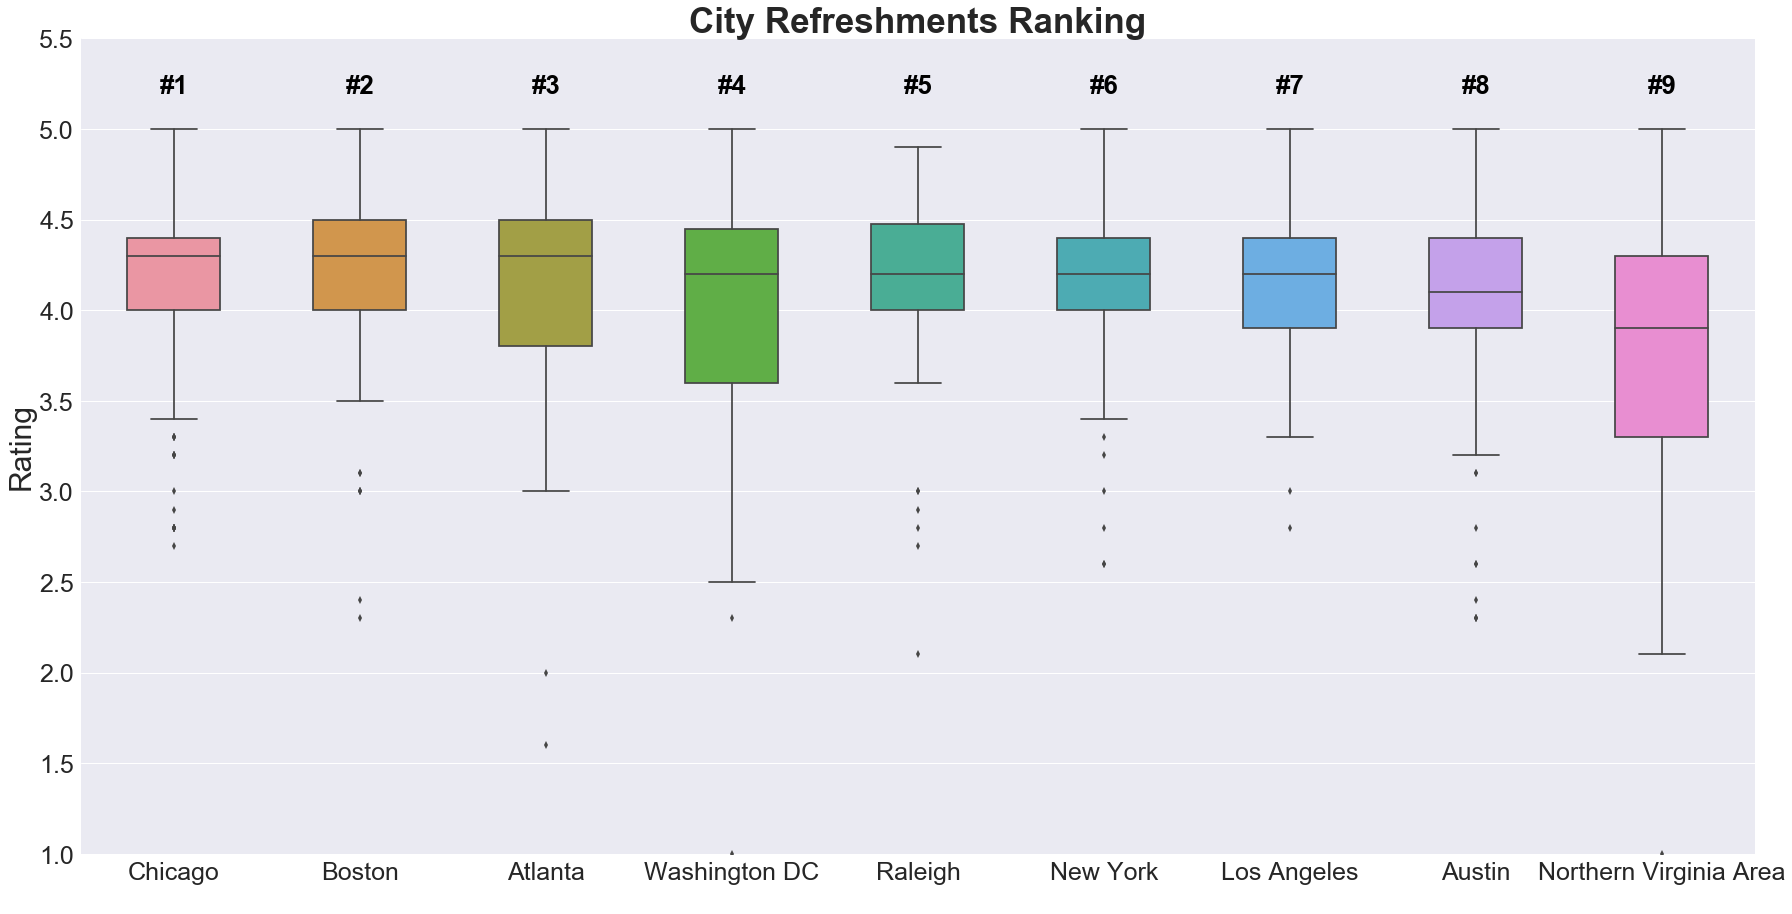

In [42]:
print("===================TEST===================")
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size


ranks = new_eatingout_df.groupby("City Name")["Rating"].median().fillna(0).sort_values()[::-1].index
print(ranks)
ranks_dict = {}
y = 1
for x in ranks:
    ranks_dict[x] = y
    y=y+1
    
print(ranks_dict)

ax = sns.boxplot(x='City Name', y='Rating', data=new_eatingout_df, width=.5, order=ranks)

# Set scale for all the fonts of the plot
sns.set(font_scale=1.8)

plt.ylim(1,5.5)
# Make x-axis, y-axis & title labels
ax.set_title("City Refreshments Ranking", fontsize=35, fontweight='bold')
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Rating", fontsize=30, verticalalignment='bottom', horizontalalignment='center')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

nobs = [str(x) for x in ranks_dict.values()]
print(nobs)
nobs = ["#" + i for i in nobs]
print(nobs)
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], 5.2, nobs[tick],
            horizontalalignment='center', size='large', color='black', weight='semibold')


print("===========================================")
print("====================END====================")
print(' ')
print(' ')
plt.savefig('Save_Figs/Refreshments.png')
plt.show()